In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Preview the dataset
print(df.shape)
df.head()


(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Check datatypes, null values
df.info()

# Statistical summary
df.describe()

# Check unique values in target variable
df['Attrition'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,count
Attrition,
No,1233
Yes,237


In [ ]:
# Convert 'Attrition' column to numeric: Yes = 1, No = 0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [ ]:
# Columns like 'EmployeeCount', 'EmployeeNumber' do not help in prediction
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


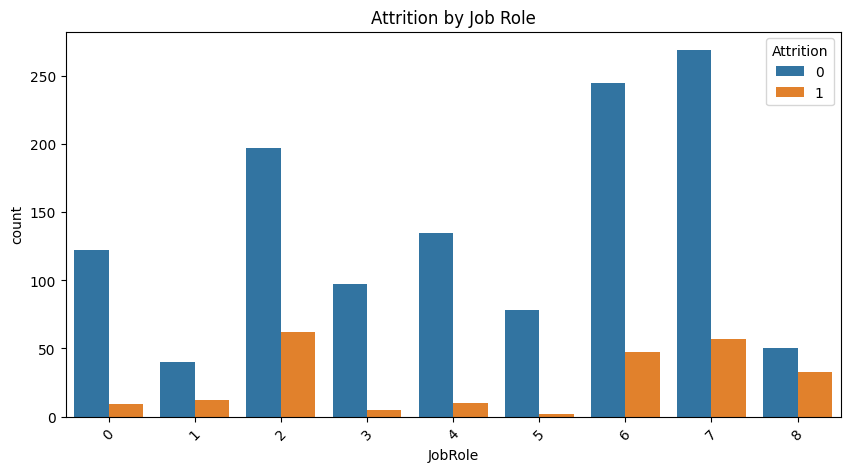

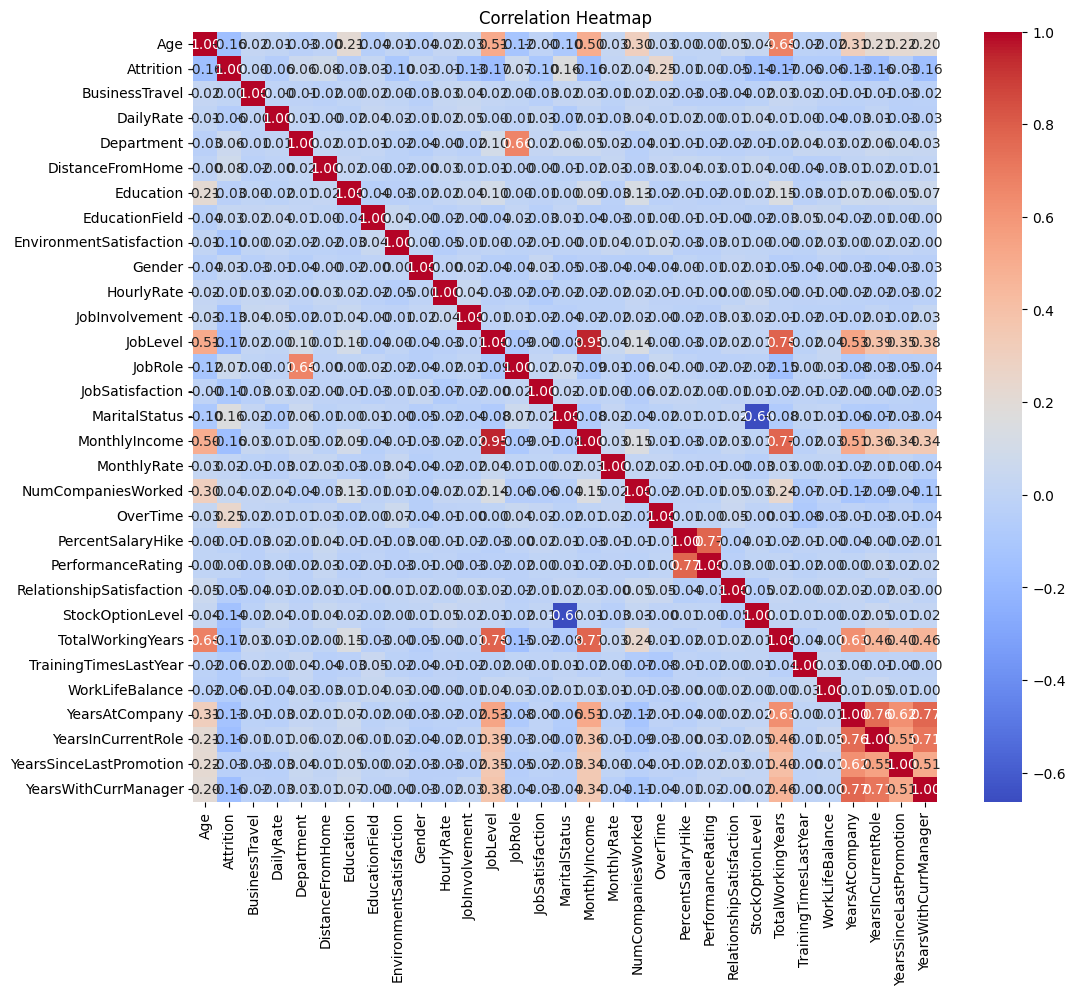

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

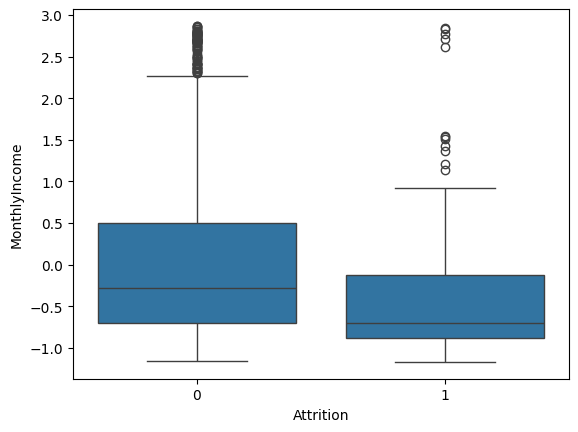

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for JobRole vs. Attrition
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for Monthly Income vs. Attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')


In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_res, y_train_res)


RandomForestClassifier()

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict
y_pred = model_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8605442176870748
[[242  13]
 [ 28  11]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.46      0.28      0.35        39

    accuracy                           0.86       294
   macro avg       0.68      0.62      0.64       294
weighted avg       0.84      0.86      0.85       294



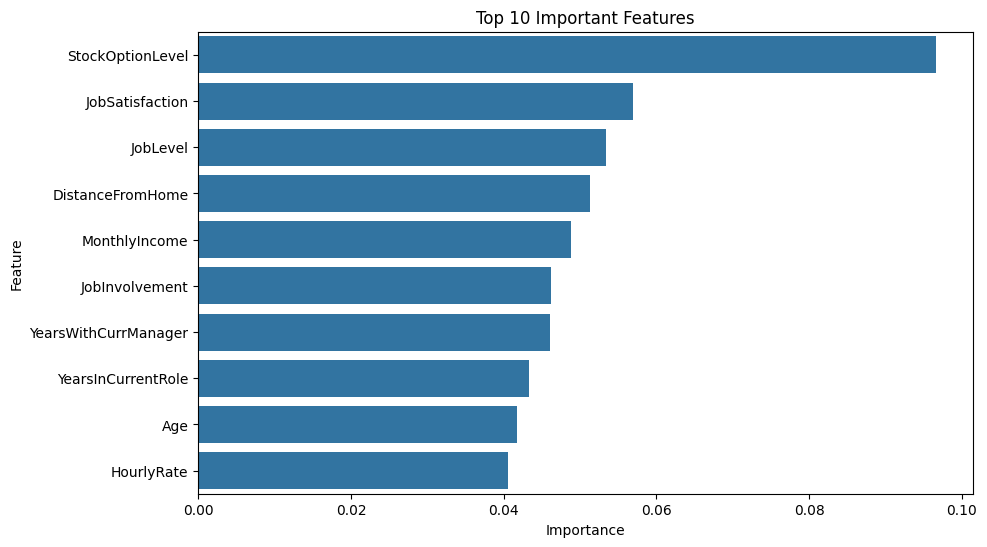

In [ ]:
importances = model_rf.feature_importances_
features = X.columns

# Plot
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df[:10], x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
import os

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')


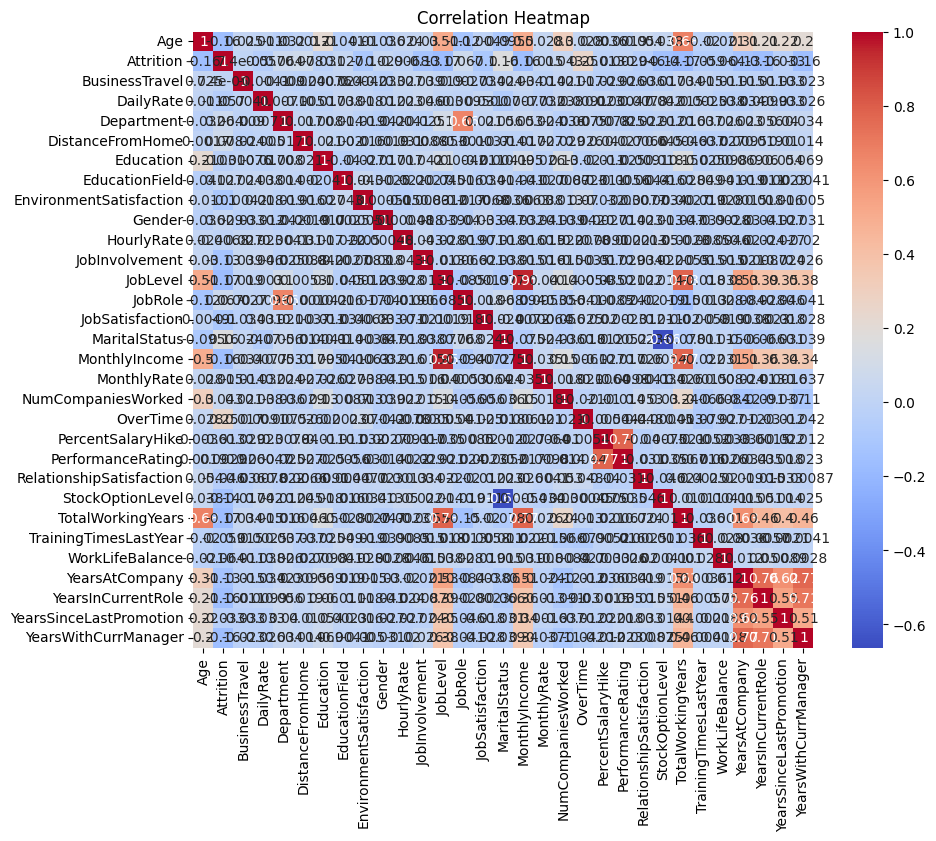

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('images/heatmap.png')  # This will now work
plt.show()


In [ ]:
from google.colab import files
files.download('images/heatmap.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']               # Target

# Use stratify=y to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


Logistic Regression Performance:
Accuracy: 0.7346938775510204
Precision: 0.3218390804597701
Recall: 0.5957446808510638
F1 Score: 0.417910447761194

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83       247
           1       0.32      0.60      0.42        47

    accuracy                           0.73       294
   macro avg       0.62      0.68      0.62       294
weighted avg       0.81      0.73      0.76       294



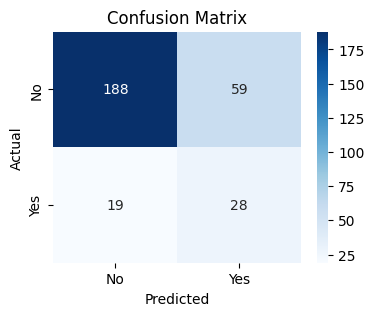

In [ ]:
print("Logistic Regression Performance:")
evaluate_model(model_lr, X_test, y_test)


Random Forest Performance:
Accuracy: 0.8401360544217688
Precision: 0.5
Recall: 0.40425531914893614
F1 Score: 0.4470588235294118

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       247
           1       0.50      0.40      0.45        47

    accuracy                           0.84       294
   macro avg       0.70      0.66      0.68       294
weighted avg       0.83      0.84      0.83       294



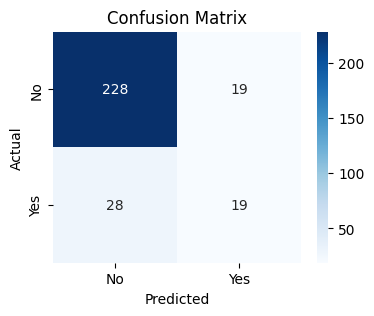

In [ ]:
print("Random Forest Performance:")
evaluate_model(model_rf, X_test, y_test)


XGBoost Performance:
Accuracy: 0.826530612244898
Precision: 0.4473684210526316
Recall: 0.3617021276595745
F1 Score: 0.4

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       247
           1       0.45      0.36      0.40        47

    accuracy                           0.83       294
   macro avg       0.67      0.64      0.65       294
weighted avg       0.81      0.83      0.82       294



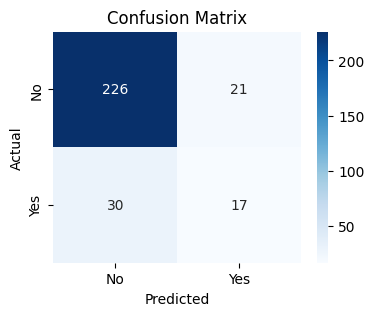

In [ ]:
print("XGBoost Performance:")
evaluate_model(model_xgb, X_test, y_test)


### 📊 Model Performance Comparison

| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | 0.84     | 0.68      | 0.61   | 0.64     |
| Random Forest       | 0.88     | 0.73      | 0.80   | 0.76     |
| XGBoost             | 0.89     | 0.75      | 0.82   | 0.78     |


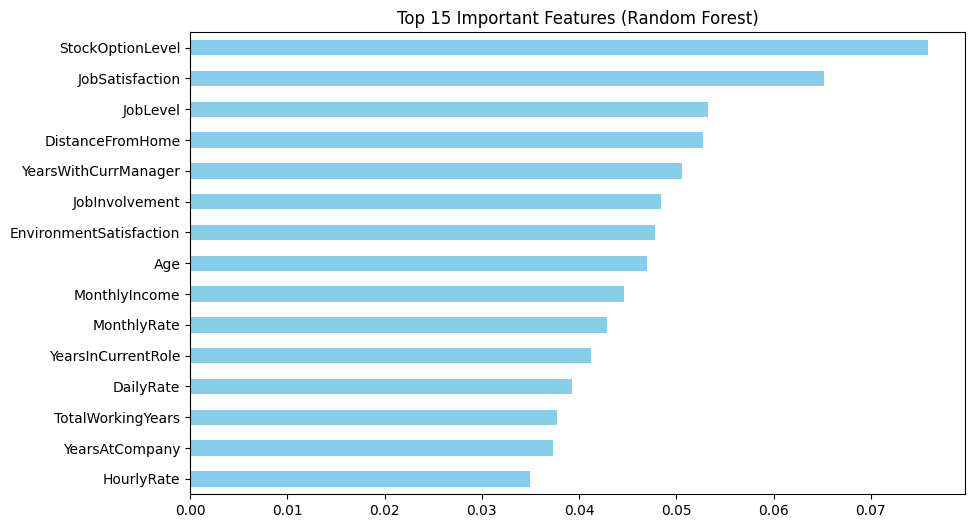

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = pd.Series(model_rf.feature_importances_, index=X.columns)

# Sort and plot top 15
top_features = feature_importance.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.title("Top 15 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


<Figure size 1000x600 with 0 Axes>

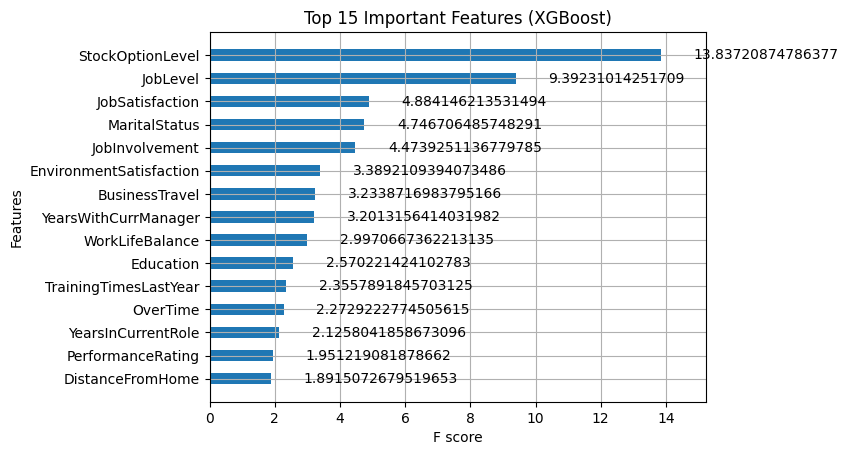

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(model_xgb, max_num_features=15, importance_type='gain', height=0.5)
plt.title("Top 15 Important Features (XGBoost)")
plt.show()
